In [13]:
import matplotlib.pyplot as plt
import torch
import json
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from netics.unionfind import mono, dist, gpu
from netics import utils
# (monolithic, distributed, gpu, utils)

from rich import console

console = console.Console()
torch.cuda.is_available()

False

Compare performance of Monolithic UF Decoder (on CPU) and GPU UF Decoder (on GPU)

**Repetition code**

In [6]:
with open('./bench/edge_weights.json', 'r') as f:
    weights = json.load(f)

In [8]:
def avg_cpu_rep_decoding_time(d, r, trials=10):
    g = utils.gene_rep_decoding_graph(d, r, **weights)
    times = []
    for _ in tqdm(range(trials)):
        utils.sample_errors(g)
        d_cpu = mono.MonoRepDecoder(g, d, r)
        start_time = time.time()
        d_cpu.decode()
        times.append(time.time() - start_time)
    return np.mean(times)


def avg_gpu_rep_decoding_time(d, r, trials=10):
    g = utils.gene_rep_decoding_graph(d, r, **weights)
    times = []
    for _ in tqdm(range(trials)):
        utils.sample_errors(g)
        d_gpu = gpu.GPURepDecoder(g, d, r)
        start_time = time.time()
        d_gpu.decode()
        times.append(time.time() - start_time)
    return np.mean(times)

In [9]:
avg_cpu_rep_decoding_time(11, 50, 100)

100%|██████████| 100/100 [00:04<00:00, 23.32it/s]


0.017265949249267578

In [10]:
avg_gpu_rep_decoding_time(11, 50, 10)

100%|██████████| 10/10 [00:15<00:00,  1.56s/it]


1.4877259731292725

In [11]:
d = 11
rounds = [20, 50, 500, 1000, 2000]
times_cpu = []
times_gpu = []
for r in rounds:
    print('Decoding d={} r={}'.format(d, r))
    times_cpu.append(avg_cpu_rep_decoding_time(d, r, trials=np.ceil(2e3 / r).astype(int)))
    times_gpu.append(avg_gpu_rep_decoding_time(d, r, trials=np.ceil(2e3 / r).astype(int)))
    print('CPU: {:.2f} s, GPU: {:.2f} s'.format(times_cpu[-1], times_gpu[-1]))
    print()

Decoding d=11 r=20


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


CPU: 0.01 s, GPU: 0.76 s

Decoding d=11 r=50


100%|██████████| 40/40 [00:53<00:00,  1.35s/it]


CPU: 0.02 s, GPU: 1.28 s

Decoding d=11 r=500


100%|██████████| 4/4 [00:26<00:00,  6.69s/it]


CPU: 0.18 s, GPU: 5.95 s

Decoding d=11 r=1000


100%|██████████| 2/2 [00:19<00:00,  9.78s/it]


CPU: 0.49 s, GPU: 8.39 s

Decoding d=11 r=2000


100%|██████████| 1/1 [00:16<00:00, 16.97s/it]

CPU: 0.91 s, GPU: 14.34 s


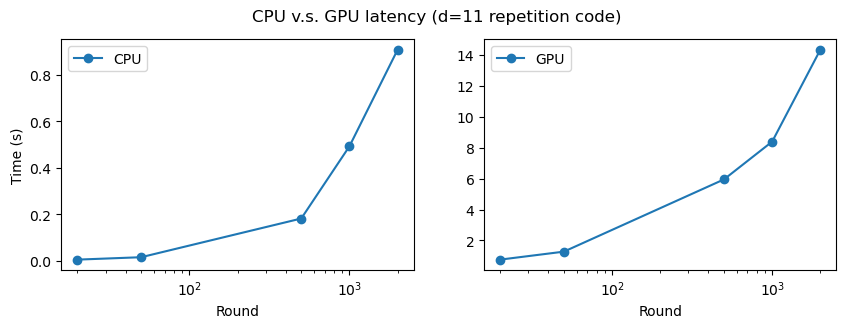

In [14]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(rounds, times_cpu, 'o-', label='CPU')
plt.legend()
plt.xscale('log')
plt.xlabel('Round')
plt.ylabel('Time (s)')

plt.subplot(1, 2, 2)
plt.plot(rounds, times_gpu, 'o-', label='GPU')
plt.legend()
plt.xscale('log')
plt.xlabel('Round')

plt.suptitle('CPU v.s. GPU latency (d={} repetition code)'.format(d))
plt.show()

**Surfacec code**

In [15]:
p_data = 0.01
p_meas = 0.05


def avg_cpu_surf_decoding_time(d, r, trials=10):
    g = utils.gene_surf_decoding_graph(d, r, p_data, p_meas)
    times = []
    for _ in tqdm(range(trials)):
        utils.sample_errors(g)
        d_cpu = mono.MonoSurfDecoder(g, d, r)
        start_time = time.time()
        d_cpu.decode()
        times.append(time.time() - start_time)
    return np.mean(times)


def avg_gpu_surf_decoding_time(d, r, trials=10):
    g = utils.gene_surf_decoding_graph(d, r, p_data, p_meas)
    times = []
    for _ in tqdm(range(trials)):
        utils.sample_errors(g)
        d_gpu = gpu.GPUSurfDecoder(g, d, r)
        start_time = time.time()
        d_gpu.decode()
        times.append(time.time() - start_time)
    return np.mean(times)

In [16]:
distances = list(range(11, 52, 4))
times_cpu = []
times_gpu = []
for d in distances:
    r = d
    print('Decoding d={}, r={}'.format(d, r))
    times_cpu.append(avg_cpu_surf_decoding_time(d, r, trials=np.ceil(1e3 / r).astype(int)))
    times_gpu.append(avg_gpu_surf_decoding_time(d, r, trials=np.ceil(1e3 / r).astype(int)))
    print('CPU: {:.2f} s, GPU: {:.2f} s'.format(times_cpu[-1], times_gpu[-1]))
    print()

Decoding d=11, r=11


100%|██████████| 91/91 [00:48<00:00,  1.88it/s]


CPU: 0.02 s, GPU: 0.44 s

Decoding d=15, r=15


100%|██████████| 67/67 [01:08<00:00,  1.02s/it]


CPU: 0.06 s, GPU: 0.78 s

Decoding d=19, r=19


100%|██████████| 53/53 [01:26<00:00,  1.64s/it]


CPU: 0.13 s, GPU: 1.20 s

Decoding d=23, r=23


100%|██████████| 44/44 [01:55<00:00,  2.62s/it]


CPU: 0.23 s, GPU: 1.79 s

Decoding d=27, r=27


100%|██████████| 38/38 [02:49<00:00,  4.45s/it]


CPU: 0.38 s, GPU: 3.15 s

Decoding d=31, r=31


100%|██████████| 33/33 [03:35<00:00,  6.52s/it]


CPU: 0.85 s, GPU: 4.52 s

Decoding d=35, r=35


100%|██████████| 29/29 [04:07<00:00,  8.55s/it]


CPU: 1.02 s, GPU: 5.81 s

Decoding d=39, r=39


100%|██████████| 26/26 [05:42<00:00, 13.19s/it]


CPU: 2.21 s, GPU: 9.38 s

Decoding d=43, r=43


 29%|██▉       | 7/24 [00:30<01:13,  4.34s/it]


KeyboardInterrupt: 

In [20]:
distances = np.array(distances)
times_cpu = np.array(times_cpu)
times_gpu = np.array(times_gpu)

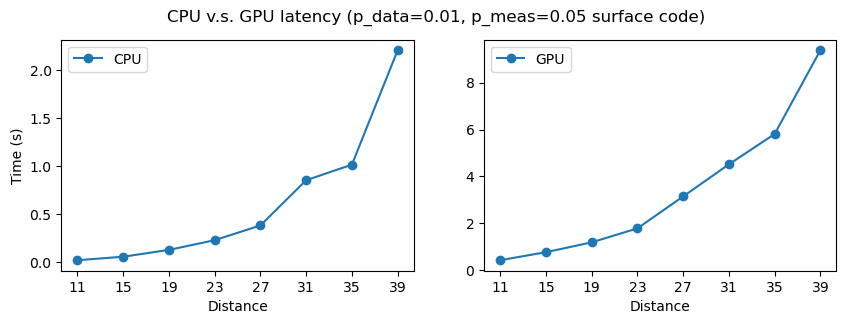

In [21]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(distances, times_cpu, 'o-', label='CPU')
plt.legend()
plt.xticks(distances)
plt.xlabel('Distance')
plt.ylabel('Time (s)')

plt.subplot(1, 2, 2)
plt.plot(distances, times_gpu, 'o-', label='GPU')
plt.legend()
plt.xticks(distances)
plt.xlabel('Distance')

plt.suptitle('CPU v.s. GPU latency (p_data={}, p_meas={} surface code)'.format(p_data, p_meas))
plt.show()